In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
from bson import Code
import pandas as pd
pd.set_option('display.max_columns', 2000)
pd.set_option('display.max_rows', 2000)
plt.style.use('ggplot')
sns.set_style(style='darkgrid')
import sys 
sys.path.append('..')

In [2]:
import src.eda_tools as et

In [3]:
games = pd.read_csv("../data/lahman_data/baseballdatabank-2019.2/core/HomeGames.csv")

In [4]:
pitching = pd.read_csv("../data/lahman_data/baseballdatabank-2019.2/core/Pitching.csv")
pitching.columns = pitching.columns + "_p"
pitching.rename({"yearID_p": "yearID"}, axis=1, inplace=True)

In [5]:
pitching_yearly_sum_df = pitching.groupby("yearID").sum()

In [6]:
games_per_year = games.groupby("year.key").sum()['games']

In [7]:
pitching_yearly_sum_df['games_per_year'] = games_per_year.values

In [8]:
batting = pd.read_csv("../data/lahman_data/baseballdatabank-2019.2/core/Batting.csv")
batting.columns = batting.columns + "_b"
batting.rename({"yearID_b": "yearID"}, axis=1, inplace=True)

In [9]:
batting_yearly_sum_df = batting.groupby("yearID").sum()

In [10]:
b_p_yearly_df = pd.concat([pitching_yearly_sum_df, batting_yearly_sum_df], axis=1)

In [11]:
fielding = pd.read_csv("../data/lahman_data/baseballdatabank-2019.2/core/Fielding.csv")
fielding.columns = fielding.columns + "_f"
fielding.rename({"yearID_f": "yearID"}, axis=1, inplace=True)

In [12]:
fielding_yearly_sum_df = fielding.groupby("yearID").sum()

In [13]:
total_yearly_df = pd.concat([b_p_yearly_df, fielding_yearly_sum_df], axis=1)

In [14]:
total_yearly_df["1B_b"] = total_yearly_df["H_b"] - total_yearly_df["2B_b"] - total_yearly_df["3B_b"] - total_yearly_df["HR_b"]

In [15]:
total_yearly_df.drop(["ERA_p", 'stint_b', 'stint_p', 'stint_f', 'BAOpp_p'], axis=1, inplace=True)

In [16]:
total_yearly_df.to_csv('../data/total_yearly.csv')

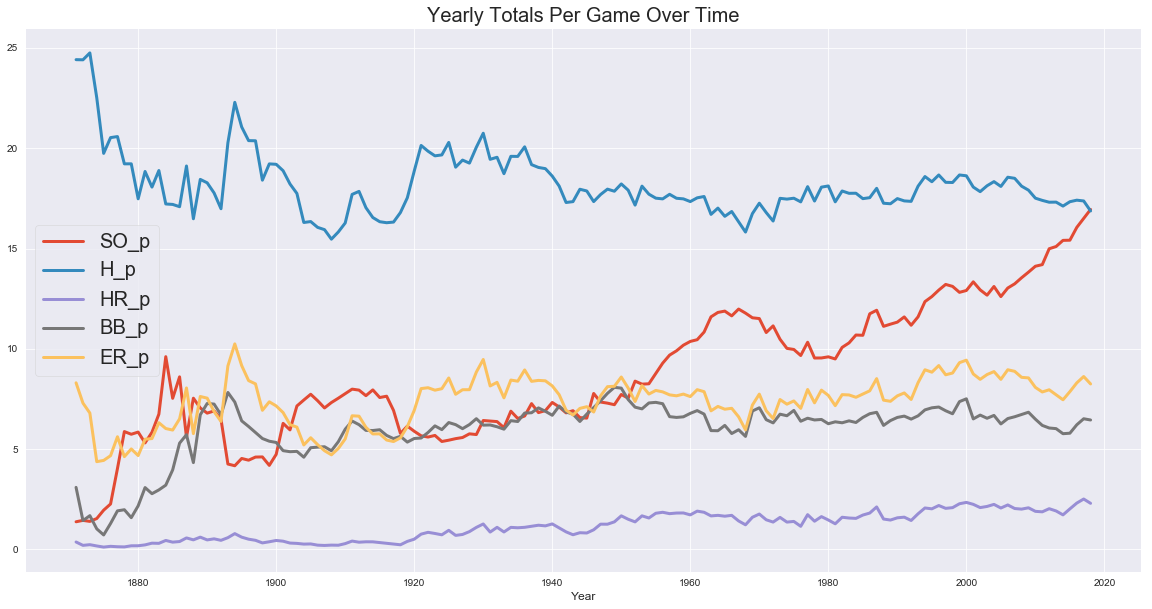

In [17]:
years = total_yearly_df.index
stats = ["SO_p", "H_p", "HR_p", "BB_p", "ER_p"]
games = total_yearly_df["games_per_year"]
et.plot_stats_over_time(years, total_yearly_df, stats, games)

In [ ]:
total_yearly_df.columns

In [ ]:
b_stats = ['1B_b', '2B_b', '3B_b', 'HR_b', 'RBI_b', 'SB_b', 'BB_b']
et.plot_stats_over_time(years, total_yearly_df, b_stats, games)

In [ ]:
pwd